# Credit Ratings EDA

Original data source: https://www.kaggle.com/datasets/agewerc/corporate-credit-rating

In [16]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Load into pandas
# ~\..\Box\STAT 222 Capstone\Raw Data\Credit Rating Data From Kaggle\corporate_rating.csv
corporate_rating = pd.read_csv('~\Box\STAT 222 Capstone\Raw Data\Credit Rating Data From Kaggle\corporate_rating.csv')
corporate_rating

<>:3: SyntaxWarning: invalid escape sequence '\B'
<>:3: SyntaxWarning: invalid escape sequence '\B'
C:\Users\ijyli\AppData\Local\Temp\ipykernel_18200\4272307766.py:3: SyntaxWarning: invalid escape sequence '\B'
  corporate_rating = pd.read_csv('~\Box\STAT 222 Capstone\Raw Data\Credit Rating Data From Kaggle\corporate_rating.csv')


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,BBB,"NVR, Inc.",NVR,Moody's Investors Service,9/5/2012,Capital Goods,11.757767,7.115059,7.057420,1.079762,...,0.343500,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348
2025,BB,Kaiser Aluminum Corporation,KALU,Standard & Poor's Ratings Services,4/28/2016,Capital Goods,2.962788,1.294743,0.428234,30.602414,...,0.363636,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373
2026,B,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,11/30/2012,Finance,0.883875,0.842553,0.233830,147.599371,...,35.017544,0.926665,1.459801,1.056480,4.034952,0.265092,9.358311,1.575328,0.283634,2.300168
2027,B,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,6/15/2012,Finance,0.911713,0.748356,0.310640,131.644566,...,0.331525,0.692804,0.744377,1.470201,3.825856,0.130692,22.440102,1.074441,0.217783,1.997608


In [18]:
# All columns
print(corporate_rating.columns)

Index(['Rating', 'Name', 'Symbol', 'Rating Agency Name', 'Date', 'Sector',
       'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
       'enterpriseValueMultiple', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'payablesTurnover'],
      dtype='object')


In [19]:
# Summarize variables
corporate_rating.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,...,2029.000000,2029.000000,2.029000e+03,2.029000e+03,2029.000000,2029.000000,2029.000000,2.029000e+03,2029.000000,2029.000000
mean,3.529607,2.653986,0.667364,333.795606,0.278447,0.431483,0.497968,0.587322,-37.517928,-73.974193,...,0.397572,0.409550,5.094719e+03,4.227549e+03,3.323579,0.437454,48.287985,6.515123e+03,1.447653,38.002718
std,44.052361,32.944817,3.583943,4447.839583,6.064134,8.984982,0.525307,11.224622,1166.172220,2350.275719,...,10.595075,3.796488,1.469156e+05,1.224000e+05,87.529866,8.984299,529.118961,1.775290e+05,19.483294,758.923588
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-100.611015,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850
25%,1.071930,0.602825,0.130630,22.905093,0.021006,0.025649,0.233127,0.044610,0.019176,0.028112,...,0.146854,0.271478,4.119924e-01,1.566038e+00,2.046822,0.028057,6.238066,2.356735e+00,0.073886,2.205912
50%,1.493338,0.985679,0.297493,42.374120,0.064753,0.084965,0.414774,0.107895,0.045608,0.074421,...,0.300539,0.644529,2.131742e+00,3.686513e+00,2.652456,0.087322,9.274398,4.352584e+00,0.133050,5.759722
75%,2.166891,1.453820,0.624906,59.323563,0.114807,0.144763,0.849693,0.176181,0.077468,0.135036,...,0.370653,0.836949,4.230253e+00,8.086152e+00,3.658331,0.149355,12.911759,7.319759e+00,0.240894,9.480892
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,429.926282,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400


In [20]:
# Convert Date to date format. It's 'M/D/YYYY'
# Represents the date of issue of a credit rating
corporate_rating['Date'] = pd.to_datetime(corporate_rating['Date'], format='%m/%d/%Y')

Axes(0.125,0.11;0.775x0.77)
Year
2005      1
2009      1
2010      9
2011     58
2012    357
2013    312
2014    383
2015    480
2016    428
Name: count, dtype: int64


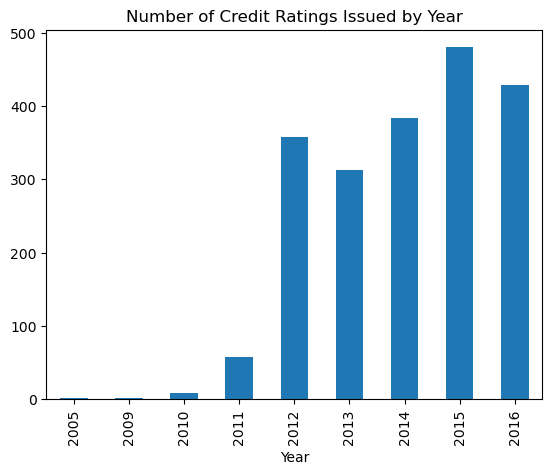

In [21]:
# Create Year variable
corporate_rating['Year'] = corporate_rating['Date'].dt.year

# Bar chart, sorted by Year
print(corporate_rating['Year'].value_counts().sort_index().plot(kind='bar', title='Number of Credit Ratings Issued by Year'))

# Table of values of Year
print(corporate_rating['Year'].value_counts().sort_index())

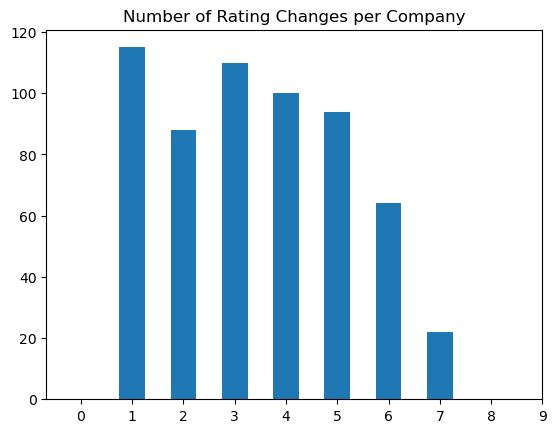

In [22]:
# How many observations/ratings per company? Create histogram with bin width of 1 and axis ticks every 1
# Bars centered over ticks
# Bar width of 0.5
plt.hist(corporate_rating['Name'].value_counts(), bins=range(10), align='left', rwidth=0.5)
plt.xticks(range(10))
plt.title('Number of Rating Changes per Company')
plt.show()

In [23]:
# Counts of Sector
print(corporate_rating['Sector'].value_counts())

Sector
Energy                   294
Basic Industries         260
Consumer Services        250
Technology               234
Capital Goods            233
Public Utilities         211
Health Care              171
Consumer Non-Durables    132
Consumer Durables         74
Transportation            63
Miscellaneous             57
Finance                   50
Name: count, dtype: int64


<Axes: xlabel='Year'>

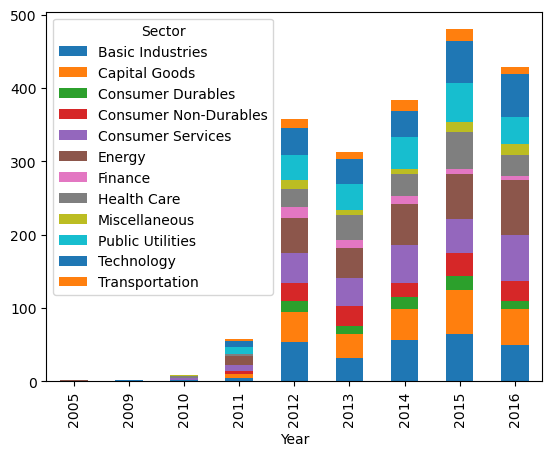

In [24]:
# Bar chart of Sector by Year
corporate_rating.groupby(['Year', 'Sector']).size().unstack().plot(kind='bar', stacked=True)

<Axes: title={'center': 'Number of Changes to Each Rating'}, xlabel='Rating'>

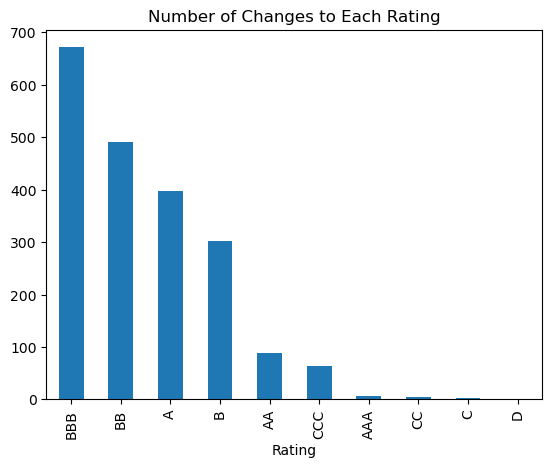

In [25]:
# Bar chart of Rating
corporate_rating['Rating'].value_counts().plot(kind='bar', title='Number of Changes to Each Rating')

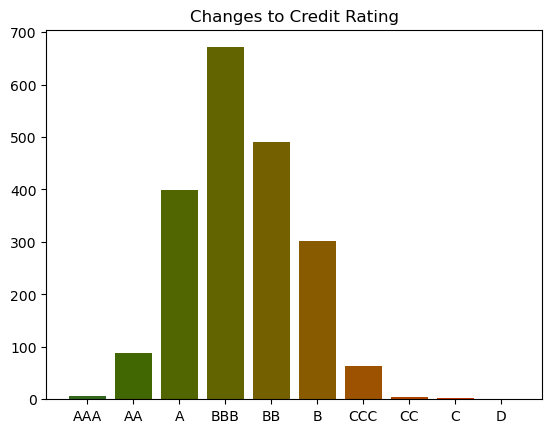

In [26]:
# Colored with gradient and ordered

# Colors AAA through D
# Used https://colordesigner.io/gradient-generator#google_vignette
# Assign hex codes from green to red
#32671d
#416703
#516600
#626400
#756000
#885b00
#9c5200
#af4500
#c33200
#d60000
hex_code_mapper = {'AAA': '#32671d', 'AA': '#416703', 'A': '#516600', 'BBB': '#626400', 'BB': '#756000', 'B': '#885b00', 'CCC': '#9c5200', 'CC': '#af4500', 'C': '#c33200', 'D': '#d60000'}

# Ordering of bars - keys from hex_code_mapper
bar_order = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'CC', 'C', 'D']
# Assign values of Rating to this ordering
corporate_rating['Rating'] = pd.Categorical(corporate_rating['Rating'], categories=bar_order, ordered=True)

# Create plot
# Save to "../Output/Distribution of Ratings.png"
plt.bar(corporate_rating['Rating'].value_counts().sort_index().index, corporate_rating['Rating'].value_counts().sort_index(), color=[hex_code_mapper[i] for i in bar_order])
plt.title('Changes to Credit Rating')
plt.savefig('../../Output/Distribution of Rating Changes.png')
plt.show()


C:\Users\ijyli\AppData\Local\Temp\ipykernel_18200\2154804769.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  corporate_rating.groupby(['Sector', 'Rating']).size().unstack().plot(kind='bar', stacked=True)


<Axes: xlabel='Sector'>

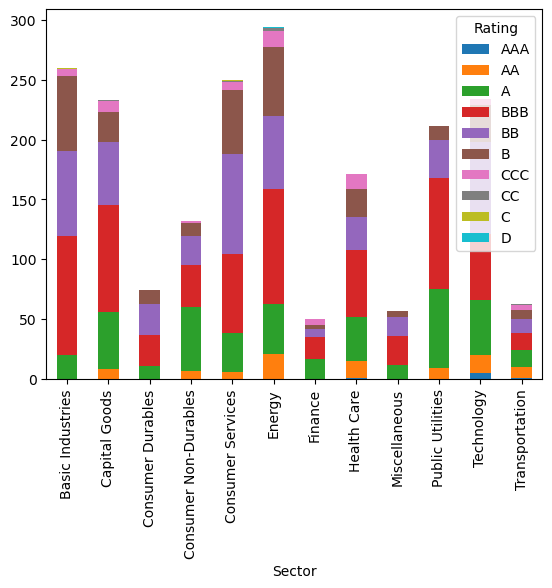

In [27]:
# Ratings by Sector
corporate_rating.groupby(['Sector', 'Rating']).size().unstack().plot(kind='bar', stacked=True)

C:\Users\ijyli\AppData\Local\Temp\ipykernel_18200\3978892243.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(map(f, plt.gca().get_xticklabels()))


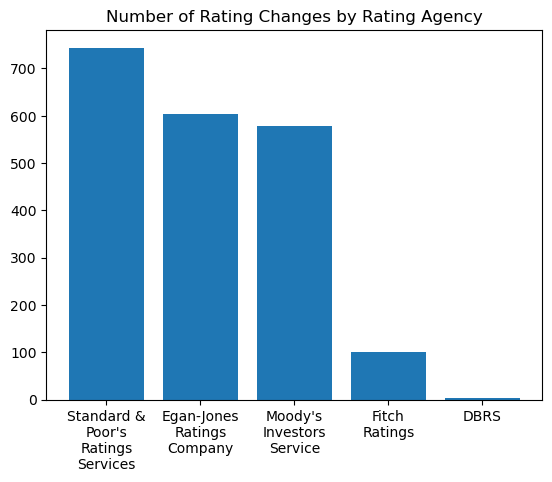

In [28]:
# Distribution of "Rating Agency Name"
# # Bar chart
# corporate_rating['Rating Agency Name'].value_counts().plot(kind='bar', title='Number of Rating Changes by Rating Agency')

# # Save plot
# plt.savefig('../../Output/Rating Changes by Rating Agency.png')

# Plot of Rating Agency Name
plt.bar(corporate_rating['Rating Agency Name'].value_counts().index, corporate_rating['Rating Agency Name'].value_counts())
plt.title('Number of Rating Changes by Rating Agency')
plt.savefig('../../Output/Rating Changes by Rating Agency.png')
import textwrap
f = lambda x: textwrap.fill(x.get_text(), 10)
plt.gca().set_xticklabels(map(f, plt.gca().get_xticklabels()))
plt.show()

In [29]:
# Count of unique firms/values of Name
corporate_rating['Name'].nunique()

593

# Limited Scope - S&P Ratings 2010-2016

In [30]:
# Regex search for Standard & Poor's
# Limit on years
s_and_p_2010_2016_data = corporate_rating[corporate_rating['Rating Agency Name'].str.contains('Standard & Poor\'s') & (corporate_rating['Year'] >= 2010) & (corporate_rating['Year'] <= 2016)]

s_and_p_2010_2016_data

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Year
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,2016-10-24,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790,2016
15,A,Philip Morris International Inc,PM,Standard & Poor's Ratings Services,2016-03-21,Consumer Non-Durables,1.027168,0.434356,0.222085,13.719354,...,0.877940,4.457715,2.520981,-2.563878,0.130094,14.385470,5.077469,0.106416,7.265322,2016
16,A,Philip Morris International Inc,PM,Standard & Poor's Ratings Services,2013-07-04,Consumer Non-Durables,0.987460,0.381402,0.126216,17.572942,...,0.881598,5.508631,1.637485,-4.914757,0.103150,10.516634,6.248459,0.126642,8.171115,2013
17,A,Philip Morris International Inc,PM,Standard & Poor's Ratings Services,2013-02-12,Consumer Non-Durables,0.974965,0.412670,0.175306,16.926402,...,0.887910,4.943853,2.028960,-10.837169,0.167806,11.241237,5.567967,0.121729,9.404352,2013
22,BBB,AT&T Inc.,T,Standard & Poor's Ratings Services,2016-10-24,Public Utilities,0.758640,0.479595,0.114442,37.425726,...,0.453131,2.890402,1.209792,3.253735,0.120963,7.484376,6.378729,0.240216,0.602383,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,CCC,"Northern Oil and Gas, Inc.",NOG,Standard & Poor's Ratings Services,2016-04-08,Energy,1.562177,1.529114,0.043402,68.267327,...,-0.169706,-0.665812,1.080071,-3.650927,-4.069763,-1.164933,3.923336,0.898051,1.127917,2016
2019,B,IRSA Inversiones Y Representaciones S.A.,IRS,Standard & Poor's Ratings Services,2010-12-17,Consumer Services,0.887235,0.864677,0.053052,228.854889,...,0.581794,0.378486,0.570860,2.344292,0.364089,12.241042,0.650550,0.284479,0.702238,2010
2021,B,SBA Communications Corporation,SBAC,Standard & Poor's Ratings Services,2013-08-28,Consumer Services,0.459629,0.266021,0.163323,19.955103,...,0.660576,2.572565,0.998349,19.002336,-0.043850,22.537466,3.894427,0.381332,16.799152,2013
2022,BB,Xperi Holding Corporation,XPER,Standard & Poor's Ratings Services,2016-10-24,Technology,3.919105,2.525982,1.286356,22.306532,...,0.908152,2.688841,2.297457,2.336493,0.349489,22.822943,2.960782,0.561062,0.073164,2016


In [31]:
# Count of unique firms/values of Name
s_and_p_2010_2016_data['Name'].nunique()

298

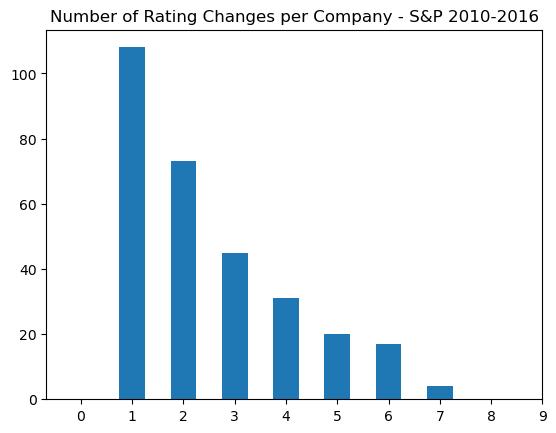

In [32]:
# How many observations/ratings per company? Create histogram with bin width of 1 and axis ticks every 1
# Bars centered over ticks
# Bar width of 0.5
plt.hist(s_and_p_2010_2016_data['Name'].value_counts(), bins=range(10), align='left', rwidth=0.5)
plt.xticks(range(10))
plt.title('Number of Rating Changes per Company - S&P 2010-2016')
plt.show()

<Axes: title={'center': 'Number of Rating Changes by Sector - S&P 2010-2016'}, ylabel='Sector'>

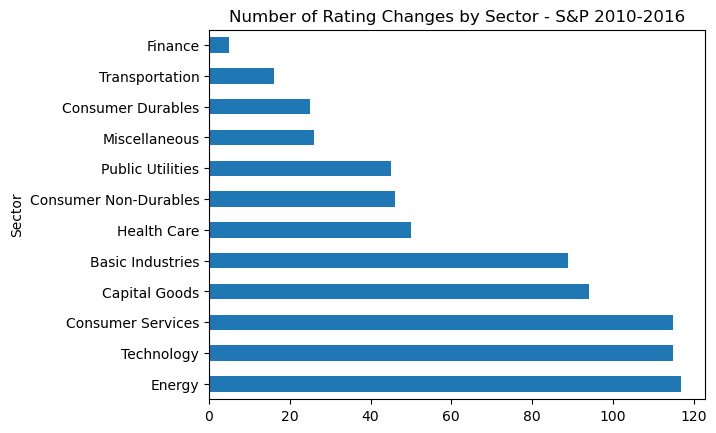

In [37]:
# Number of ratings by sector
s_and_p_2010_2016_data['Sector'].value_counts()
# Bar chart
#s_and_p_2010_2016_data['Sector'].value_counts().plot(kind='bar', title='Number of Rating Changes by Sector - S&P 2010-2016')
# Horizontal version
s_and_p_2010_2016_data['Sector'].value_counts().plot(kind='barh', title='Number of Rating Changes by Sector - S&P 2010-2016')

<Axes: title={'center': 'Number of Firms by Sector - S&P 2010-2016'}, ylabel='Sector'>

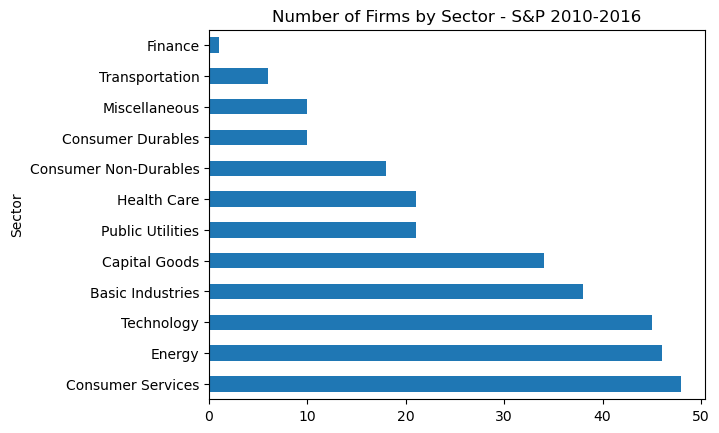

In [39]:
# Number of firms by sector
# Horizontal version
s_and_p_2010_2016_data[['Name', 'Sector']].drop_duplicates()['Sector'].value_counts().plot(kind='barh', title='Number of Firms by Sector - S&P 2010-2016')